# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid="+weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                         "Date": city_date})
        print(city_data["City"])
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manakara
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
City not found. Skipping...
Processing Record 4 of Set 1 | butaritari
City not found. Skipping...
Processing Record 5 of Set 1 | sao joao da barra
City not found. Skipping...
Processing Record 6 of Set 1 | nouadhibou
City not found. Skipping...
Processing Record 7 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 8 of Set 1 | aklavik
City not found. Skipping...
Processing Record 9 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 10 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
City not found. Skipping...
Processing Record 12 of Set 1 | vaini
City not found. Skipping...
Processing Record 13 of Set 1 | geraldton
City not found. Skipping...
Processing Record 14 of Set 1 |

City not found. Skipping...
Processing Record 18 of Set 3 | narsipatnam
City not found. Skipping...
Processing Record 19 of Set 3 | nome
City not found. Skipping...
Processing Record 20 of Set 3 | saint-joseph
City not found. Skipping...
Processing Record 21 of Set 3 | esperance
City not found. Skipping...
Processing Record 22 of Set 3 | liverpool
City not found. Skipping...
Processing Record 23 of Set 3 | malakal
City not found. Skipping...
Processing Record 24 of Set 3 | kavaratti
City not found. Skipping...
Processing Record 25 of Set 3 | dingle
City not found. Skipping...
Processing Record 26 of Set 3 | marcona
City not found. Skipping...
Processing Record 27 of Set 3 | hithadhoo
City not found. Skipping...
Processing Record 28 of Set 3 | cascavel
City not found. Skipping...
Processing Record 29 of Set 3 | kapaa
City not found. Skipping...
Processing Record 30 of Set 3 | yeovil
City not found. Skipping...
Processing Record 31 of Set 3 | nikolskoye
City not found. Skipping...
Proces

City not found. Skipping...
Processing Record 37 of Set 5 | vila
City not found. Skipping...
Processing Record 38 of Set 5 | kuna
City not found. Skipping...
Processing Record 39 of Set 5 | nyimba
City not found. Skipping...
Processing Record 40 of Set 5 | tura
City not found. Skipping...
Processing Record 41 of Set 5 | grand gaube
City not found. Skipping...
Processing Record 42 of Set 5 | colon
City not found. Skipping...
Processing Record 43 of Set 5 | mongo
City not found. Skipping...
Processing Record 44 of Set 5 | aksarka
City not found. Skipping...
Processing Record 45 of Set 5 | tayoltita
City not found. Skipping...
Processing Record 46 of Set 5 | chapais
City not found. Skipping...
Processing Record 47 of Set 5 | biltine
City not found. Skipping...
Processing Record 48 of Set 5 | anchorage
City not found. Skipping...
Processing Record 49 of Set 5 | mwene-ditu
City not found. Skipping...
Processing Record 0 of Set 6 | bathsheba
City not found. Skipping...
Processing Record 1 of

City not found. Skipping...
Processing Record 6 of Set 8 | tautira
City not found. Skipping...
Processing Record 7 of Set 8 | xinyu
City not found. Skipping...
Processing Record 8 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 8 | ponta delgada
City not found. Skipping...
Processing Record 10 of Set 8 | tadine
City not found. Skipping...
Processing Record 11 of Set 8 | vanavara
City not found. Skipping...
Processing Record 12 of Set 8 | severobaykalsk
City not found. Skipping...
Processing Record 13 of Set 8 | clarence town
City not found. Skipping...
Processing Record 14 of Set 8 | yelizovo
City not found. Skipping...
Processing Record 15 of Set 8 | baykit
City not found. Skipping...
Processing Record 16 of Set 8 | ishigaki
City not found. Skipping...
Processing Record 17 of Set 8 | himora
City not found. Skipping...
Processing Record 18 of Set 8 | matay
City not found. Skipping...
Processing Record 19 of Set 8 | constitucion
City not found. Skipping..

City not found. Skipping...
Processing Record 25 of Set 10 | pilikwe
City not found. Skipping...
Processing Record 26 of Set 10 | innisfail
City not found. Skipping...
Processing Record 27 of Set 10 | lerwick
City not found. Skipping...
Processing Record 28 of Set 10 | flinders
City not found. Skipping...
Processing Record 29 of Set 10 | necochea
City not found. Skipping...
Processing Record 30 of Set 10 | ovalle
City not found. Skipping...
Processing Record 31 of Set 10 | abomey
City not found. Skipping...
Processing Record 32 of Set 10 | tarudant
City not found. Skipping...
Processing Record 33 of Set 10 | meadow lake
City not found. Skipping...
Processing Record 34 of Set 10 | quatre cocos
City not found. Skipping...
Processing Record 35 of Set 10 | wanparti
City not found. Skipping...
Processing Record 36 of Set 10 | amderma
City not found. Skipping...
Processing Record 37 of Set 10 | shitanjing
City not found. Skipping...
Processing Record 38 of Set 10 | hervey bay
City not found.

City not found. Skipping...
Processing Record 42 of Set 12 | banda aceh
City not found. Skipping...
Processing Record 43 of Set 12 | gresham
City not found. Skipping...
Processing Record 44 of Set 12 | malanje
City not found. Skipping...
Processing Record 45 of Set 12 | karratha
City not found. Skipping...
Processing Record 46 of Set 12 | taunggyi
City not found. Skipping...
Processing Record 47 of Set 12 | vagur
City not found. Skipping...
Processing Record 48 of Set 12 | porteirinha
City not found. Skipping...
Processing Record 49 of Set 12 | ilo
City not found. Skipping...
Processing Record 0 of Set 13 | sinnamary
City not found. Skipping...
Processing Record 1 of Set 13 | richards bay
City not found. Skipping...
Processing Record 2 of Set 13 | falam
City not found. Skipping...
Processing Record 3 of Set 13 | samur
City not found. Skipping...
Processing Record 4 of Set 13 | noumea
City not found. Skipping...
Processing Record 5 of Set 13 | inirida
City not found. Skipping...
Process

In [4]:
print(len(city_data))

553


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manakara,-22.1333,48.0167,294.86,92,35,2.59,MG,1681865542
1,ushuaia,-54.8000,-68.3000,278.96,70,100,2.57,AR,1681865543
2,jamestown,42.0970,-79.2353,275.77,94,100,3.09,US,1681865543
3,butaritari,3.0707,172.7902,301.27,77,50,5.49,KI,1681865543
4,sao joao da barra,-21.6403,-41.0511,299.20,83,100,4.15,BR,1681865544


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manakara,-22.1333,48.0167,294.86,92,35,2.59,MG,1681865542
1,ushuaia,-54.8000,-68.3000,278.96,70,100,2.57,AR,1681865543
2,jamestown,42.0970,-79.2353,275.77,94,100,3.09,US,1681865543
3,butaritari,3.0707,172.7902,301.27,77,50,5.49,KI,1681865543
4,sao joao da barra,-21.6403,-41.0511,299.20,83,100,4.15,BR,1681865544


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

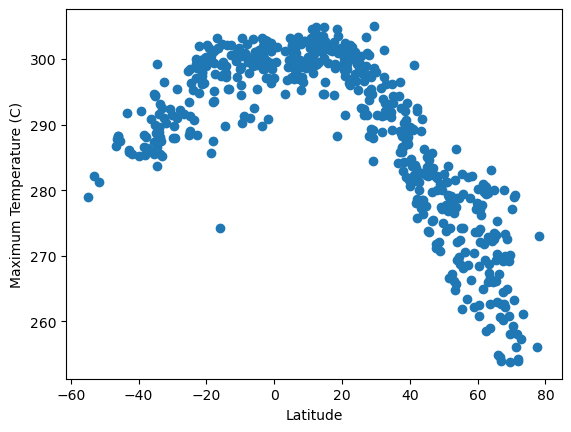

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1a.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

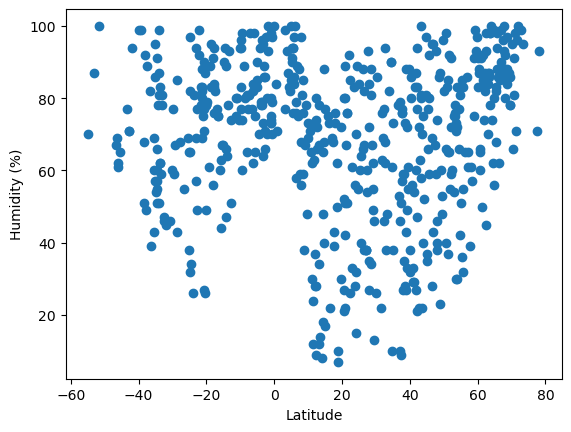

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2a.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

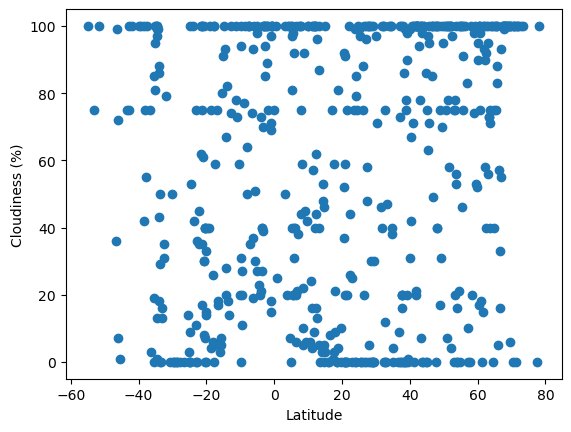

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3a.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

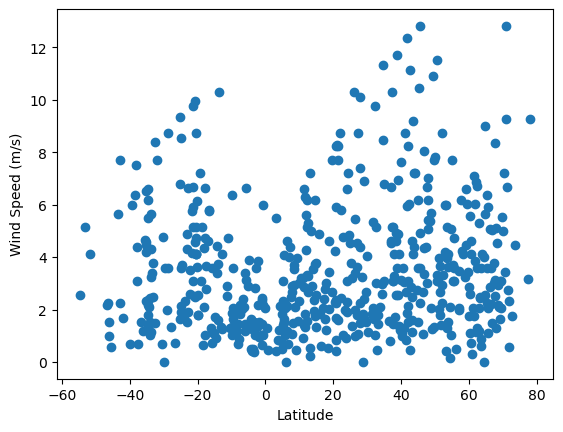

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4a.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def do_plotting(xval, yval, xpos, ypos):
    slope, inter, r_val, p_val, std_err = st.linregress(xval, yval)
    print(f"r-squared value is {round(st.pearsonr(xval,yval)[0],2)}")
    equation = "y =" + str(round(slope,2)) + "x + " + str(round(inter,2))
    reg_eq = slope * xval + inter
    fig = plt.figure()
    fig.set_figwidth(7)
    plt.scatter(xval, yval)
    plt.plot(xval,reg_eq,"r--")
    plt.annotate(equation, (xpos,ypos), color="black")
    #plt.text(xpos,ypos, equation)
    #plt.xticks(temp, rotation=45)
    #plt.xlabel('Latitude')
    #plt.ylabel('Temperature (C)')
    return



In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,275.77,94,100,3.09,US,1681865543
3,butaritari,3.0707,172.7902,301.27,77,50,5.49,KI,1681865543
5,nouadhibou,20.9310,-17.0347,291.41,89,0,5.91,MR,1681865544
6,yellowknife,62.4560,-114.3525,279.44,45,40,6.71,CA,1681865379
7,aklavik,68.2191,-135.0107,262.15,88,100,4.55,CA,1681865544


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manakara,-22.1333,48.0167,294.86,92,35,2.59,MG,1681865542
1,ushuaia,-54.8000,-68.3000,278.96,70,100,2.57,AR,1681865543
4,sao joao da barra,-21.6403,-41.0511,299.20,83,100,4.15,BR,1681865544
8,carnarvon,-24.8667,113.6333,298.46,32,9,8.55,AU,1681865545
9,bambous virieux,-20.3428,57.7575,299.29,78,40,4.12,MU,1681865545


###  Temperature vs. Latitude Linear Regression Plot

r-squared value is -0.91


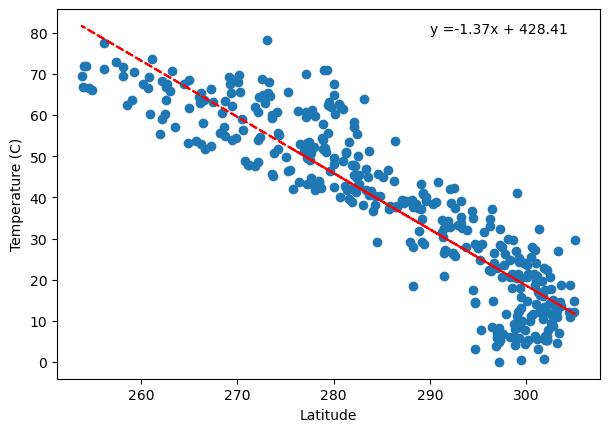

In [20]:
# Linear regression on Northern Hemisphere
temp = northern_hemi_df["Max Temp"]
lat = northern_hemi_df["Lat"]
do_plotting(temp,lat,290,80)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()


r-squared value is 0.73


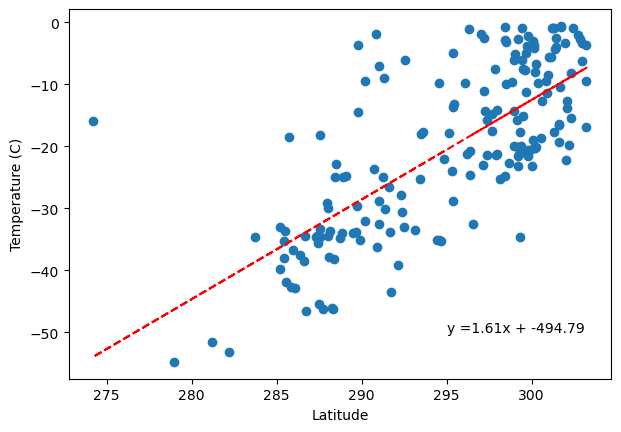

In [21]:
# Linear regression on Southern Hemisphere
temp =southern_hemi_df["Max Temp"]
lat = southern_hemi_df["Lat"]
do_plotting(temp,lat,295,-50)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()


**Discussion about the linear relationship:** The Northern and Southern Hemispheres display opposite results. In the North, there is a negative relationship between temperatue and latitude, whilst in the South, the relationship is positive. The r-squared values indicate a strong (positive or negative) correlation between both temperatue and latitude.

### Humidity vs. Latitude Linear Regression Plot

r-squared value is 0.25


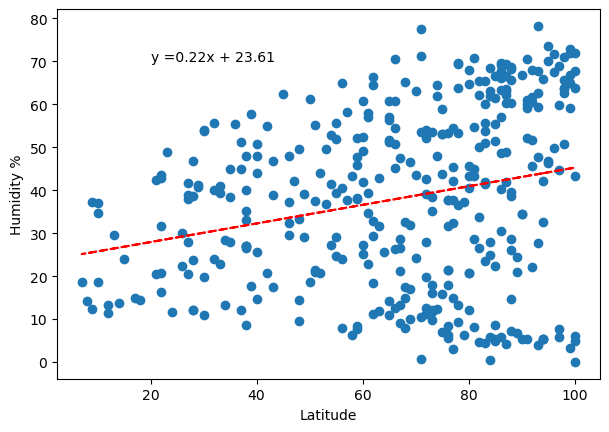

In [22]:
# Northern Hemisphere
humid = northern_hemi_df["Humidity"]
lat = northern_hemi_df["Lat"]
do_plotting(humid,lat,20,70)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

r-squared value is 0.25


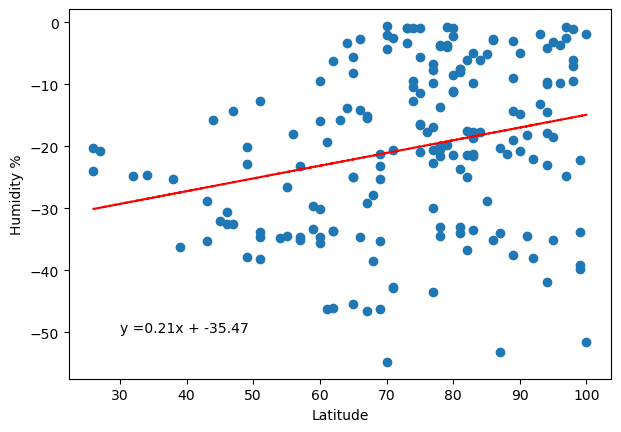

In [28]:
# Southern Hemisphere
humid =southern_hemi_df["Humidity"]
lat = southern_hemi_df["Lat"]
do_plotting(humid,lat,30,-50)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship: For both the Northern and Southern hemispheres, there is a positive relationship between humidity and latitude. However, with the r-squared value of 0.25 for both, the correlation is weak. 

### Cloudiness vs. Latitude Linear Regression Plot

r-squared value is 0.26


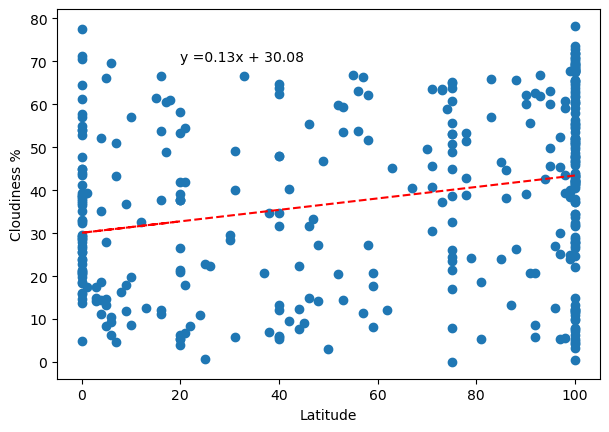

In [29]:
# Northern Hemisphere
cloud = northern_hemi_df["Cloudiness"]
lat = northern_hemi_df["Lat"]
do_plotting(cloud,lat,20,70)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

r-squared value is 0.09


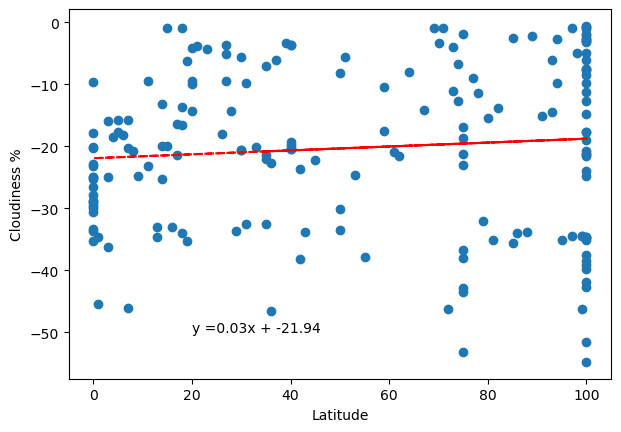

In [25]:
# Southern Hemisphere
cloud =southern_hemi_df["Cloudiness"]
lat = southern_hemi_df["Lat"]
do_plotting(cloud,lat,20,-50)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** There is a positive relationship in the Northern Hemisphere between Cloudiness and Latitude. However, the r-squared value indicates a weak correlation. In the Southern Hemisphere, the slope and the R-square value show there is no relationship between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared value is 0.17


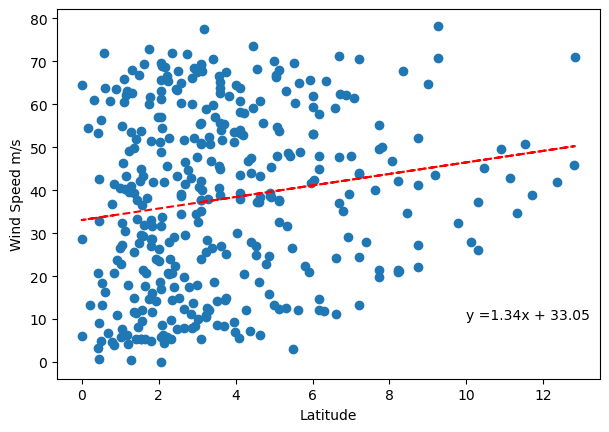

In [26]:
# Northern Hemisphere
wind = northern_hemi_df["Wind Speed"]
lat = northern_hemi_df["Lat"]
do_plotting(wind,lat,10,10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.show()

r-squared value is -0.25


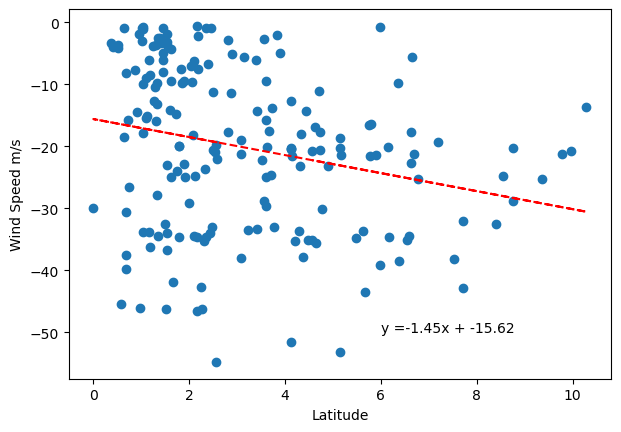

In [30]:
# Southern Hemisphere
wind =southern_hemi_df["Wind Speed"]
lat = southern_hemi_df["Lat"]
do_plotting(wind,lat,6,-50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere show a weak positive correlation bewteen WindSpeed and Latitude, having an R-square of 0.17. The Southern Hemisphere, however shows a negative weak correlation.